# **PMR3508 - Exercício Programa 02**: <br> **Redes Neurais e o Dataset MNIST**
---
---

## ✏️ **Cabeçalho**:

### **Nome**: `Renan de Toledo Groto`
### **NUSP**: `14605675`
### **Hash**: `27`

---

## 📜 **Descrição:**

Neste exercício, você irá trabalhar com o **dataset MNIST**, um conjunto de dados com 70.000 imagens de dígitos escritos à mão. Seu objetivo será aplicar os conceitos de **Redes Neurais Artificiais (ANNs)** vistos na aula teórica. Este EP está dividido em tarefas, sua formatação não deve ser alterada, mas novas células de código ou texto podem ser criadas nos blocos de cada tarefa.

---

## ⚠️ **Instruções:**
- Complete todas as tarefas abaixo, respondendo às perguntas e escrevendo o código necessário.
- Comente seu código para facilitar a correção.
- Entregue o notebook no formato `.ipynb`.

---



## ✅ **Tarefas:**

1. **Probabilidades de dígitos no *dataset***       ⇒ `2 pontos`
2. **Análise Exploratória de Dados (EDA)**          ⇒ `2 pontos`
3. **Treinamento e teste de Modelos**               ⇒ `2 pontos`
4. **Comunicação de Resultados e Visualizações**    ⇒ `2 pontos`
5. **Publicação no *Kaggle* e Documentação**        ⇒ `2 pontos`

---

<br>
<center>
        <h1>
        <b>
        BOA SORTE !!!
        </b>
        </h1>
</center>
<br>

---
---

## ⏳ Loading dos Dados

In [ ]:
import pickle
import random
import numpy as np
import os
from os.path import join

# Configuração de seeds para replicabilidade
np.random.seed(42)  # Seed para NumPy
random.seed(42)     # Seed para o módulo random

input_path = os.getcwd()  # Obtém o diretório atual
images_filepath = join(input_path, 'MNIST-images.pkl')
labels_filepath = join(input_path, 'MNIST-labels.pkl')
validation_images_filepath = join(input_path, 'MNIST-validation-images.pkl')

with open(images_filepath, 'rb') as f:
    X_tot = pickle.load(f)

with open(labels_filepath, 'rb') as f:
    y_tot = pickle.load(f)

with open(validation_images_filepath, 'rb') as f:
    X_val = pickle.load(f)

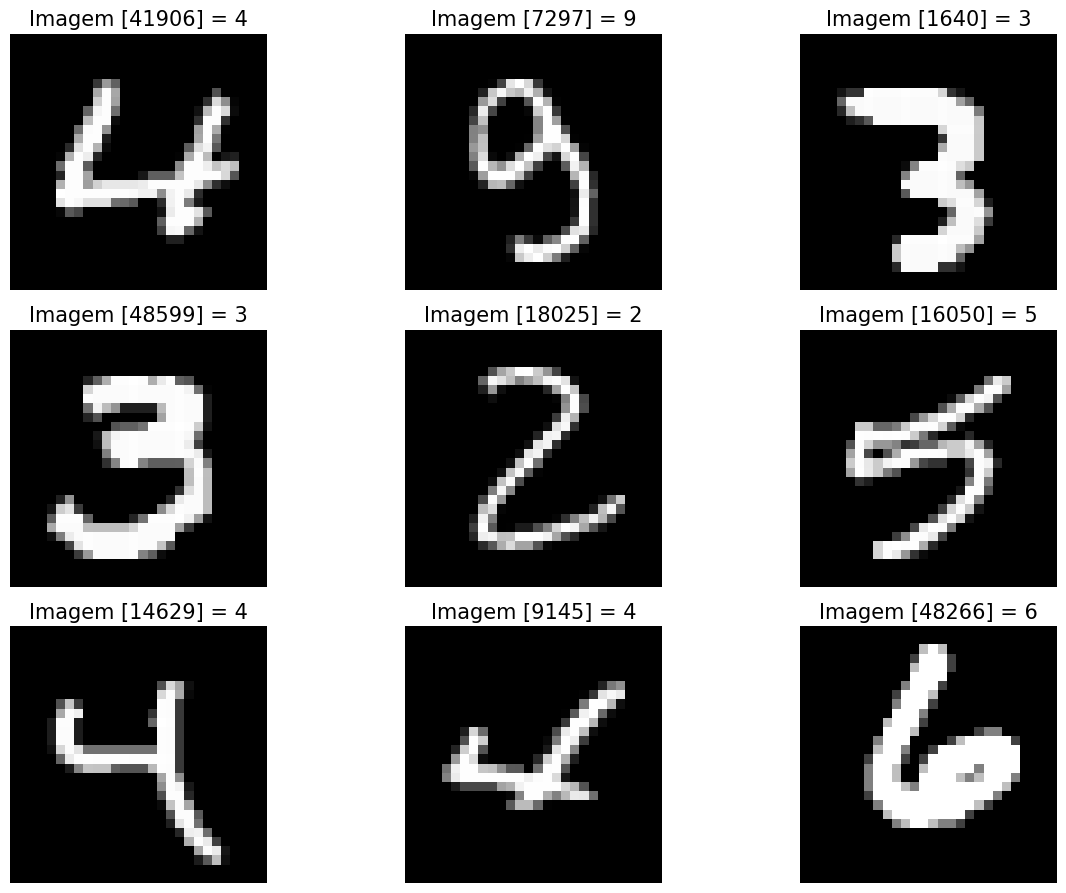

In [ ]:
'''
TESTE DE CARREGAMENTO DO DATASET POR VISUALIZAÇÃO
Este bloco visualiza algumas imagens do dataset MNIST para verificar se o
carregamento foi realizado corretamente.
'''

%matplotlib inline
import random
import matplotlib.pyplot as plt

def show_images(images, title_texts):
    # Função para mostrar as imagens com seus respectivos títulos
    cols = 3  # Número de colunas na visualização
    rows = int(len(images) / cols) + 1  # Calcula o número de linhas
    plt.figure(figsize=(12, 12))  # Define o tamanho da figura
    index = 1
    for x in zip(images, title_texts):  # Itera sobre as imagens e títulos
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)  # Adiciona um subplot
        plt.axis('off')  # Desativa os eixos
        plt.imshow(image, cmap=plt.cm.gray)  # Mostra a imagem em escala de cinza
        if (title_text != ''):
            plt.title(title_text, fontsize=15)  # Define o título da imagem
        index += 1
    plt.tight_layout()  # Ajusta o layout para evitar sobreposição de títulos
    plt.show()  # Exibe a figura com as imagens e títulos

images_2_show = []  # Lista para armazenar as imagens a serem mostradas
titles_2_show = []  # Lista para armazenar os títulos das imagens
# Seleciona aleatoriamente 9 imagens de treino
for i in range(0, 9):
    r = random.randint(1, 60000)
    images_2_show.append(X_tot[r])  # Adiciona a imagem selecionada à lista
    titles_2_show.append(f"Imagem [{str(r)}] = {str(y_tot[r])}")  # Adiciona o título correspondente

show_images(images_2_show, titles_2_show)  # Exibe as imagens selecionadas

# 0️⃣ Suas bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier

# 1️⃣ Tarefa 01: Probabilidades 🎲

## 🧑🏻‍💻 Item a)

Descubra o número do Dataset associado ao seu Hash.


In [ ]:
hash = 27

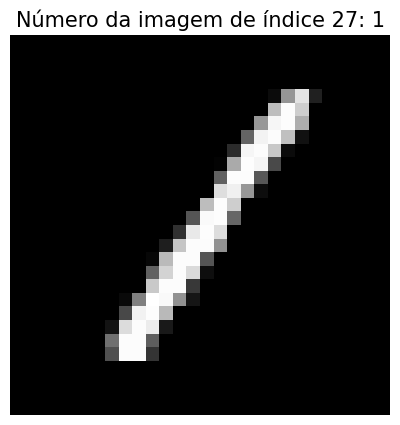

In [ ]:
label = y_tot[hash]
image = X_tot[hash]
show_images([image], [f"Número da imagem de índice {hash}: {label}"])

O número do meu hash é 1

## 🔦 Item b)

Determine, para a imagem vinculada ao seu Hash, qual é a Probabilidade de um píxel claro (128 - 225) para esta única imagem?

In [ ]:
pixels_claros = np.sum((image >= 128) & (image <= 225))
pixels_totais = image.shape[0] * image.shape[1] #grade 28 por 28 pixels

In [ ]:
print(f"A Probabilidade de um pixel ser claro (128 - 225) na imagem {hash} de número 1 é: {pixels_claros/pixels_totais*100:.2f}%")

A Probabilidade de um pixel ser claro (128 - 225) na imagem 27 de número 1 é: 2.93%


## ♟️ Item c)

Qual é a probabilidade de um píxel ser claro dentre todos os píxeis que tem a mesma classe que a sua imagem obtida em a)?

In [ ]:
imagem_1 = X_tot[y_tot == label]

In [ ]:
#assumindo que o pixel branco é de 128 a 225
claros_1 = np.sum((imagem_1 >= 128) & (imagem_1 <= 225))

In [ ]:
total_1 = pixels_totais*len(imagem_1)

In [ ]:
print(f"A Probabilidade de um pixel de label {label} ser claro é {claros_1/total_1*100:.2f}%")

A Probabilidade de um pixel de label 1 ser claro é 2.37%


---

# 2️⃣ Tarefa 02: Análise Exploratória de Dados 📊

## ✨ Item a)

Conte quantas vezes cada dígito (de 0 a 9) aparece e responda:

1. Todos os dígitos aparecem a mesma quantidade?

2. Qual o valor médio dos píxeis de cada dígito?

In [ ]:
valores, contagens = np.unique(y_tot, return_counts=True)
print(f"{'Número':<10}{'Aparições':<10}")
for valor, contagem in zip(valores, contagens):
    print(f"{valor:<10}{contagem:<10}")

Número    Aparições 
0         5920      
1         6725      
2         6023      
3         6107      
4         5918      
5         5376      
6         5915      
7         6238      
8         5856      
9         5922      


### Resposta 1
Os dígitos não aparecem na mesma quantidade, uma vez que as aparições não são iguais, conforme mostradas acima
No caso, 1 é o número com maiores aparições e 5 é o com menos


In [ ]:
print(f"{'Número':<10}{'Média de pixels':<20}")
for i in range(0, 10):
    if np.sum(y_tot == i) > 0:
        media = np.mean(X_tot[y_tot == i])
        print(f"{i:<10}{media:<20.4f}")
    else:
        print(f"{i:<10}{'N/A':<20}")

Número    Média de pixels     
0         44.2282             
1         19.4027             
2         38.0212             
3         36.2322             
4         31.0416             
5         32.9240             
6         35.2435             
7         29.2555             
8         38.4030             
9         31.3396             


### Resposta 2
Os valores médios para cada pixel estão conforme mostrados acima


## 📏 Item b)

Faça um histograma que mostre a distribuição dos valores dos píxeis para cada dígito. Há muitos valores que são “apagados” (ou seja, com valor 0) ou a distribuição dos valores é mais equilibrada entre os dígitos?


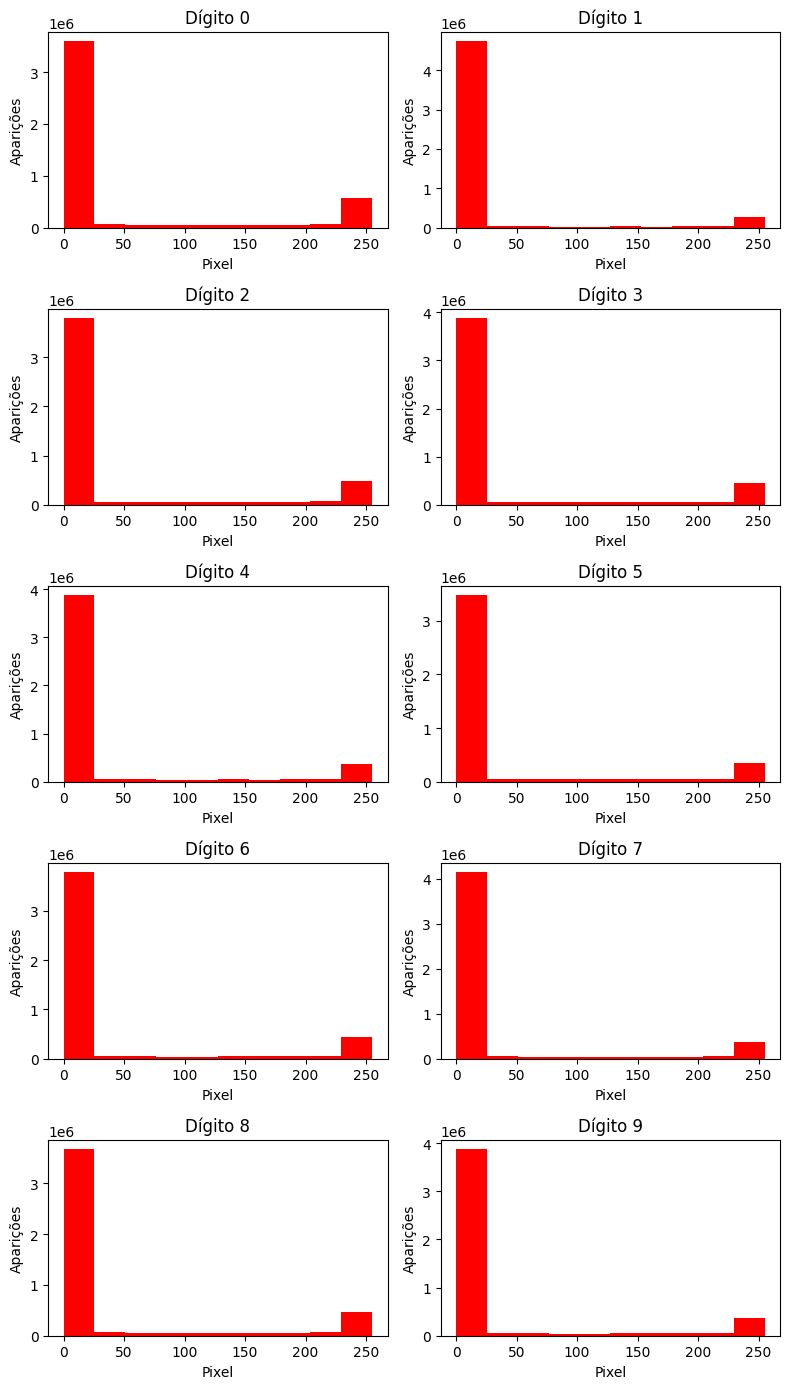

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(8, 14))
for i in range(10):
    digit_images = X_tot[y_tot == i]
    axs[i // 2, i % 2].hist(digit_images.flatten(), bins=10, color='red')
    axs[i // 2, i % 2].set_title(f'Dígito {i}')
    axs[i // 2, i % 2].set_xlabel('Pixel')
    axs[i // 2, i % 2].set_ylabel('Aparições')
plt.tight_layout()
plt.show()

Observamos que os valores, ao invés de estarem uniformemente distribuidos, se concentram em Pixels 0 e próximo ao 250, locias onde são pretos e brancos, respectivamente.

## 🤓 Item c)

Crie uma imagem para cada dígito (de 0 a 9) em que cada píxel dessa nova imagem representa a média do valor dos píxeis para aquela classe. Você consegue reconhecer os dígitos nas imagens criadas?

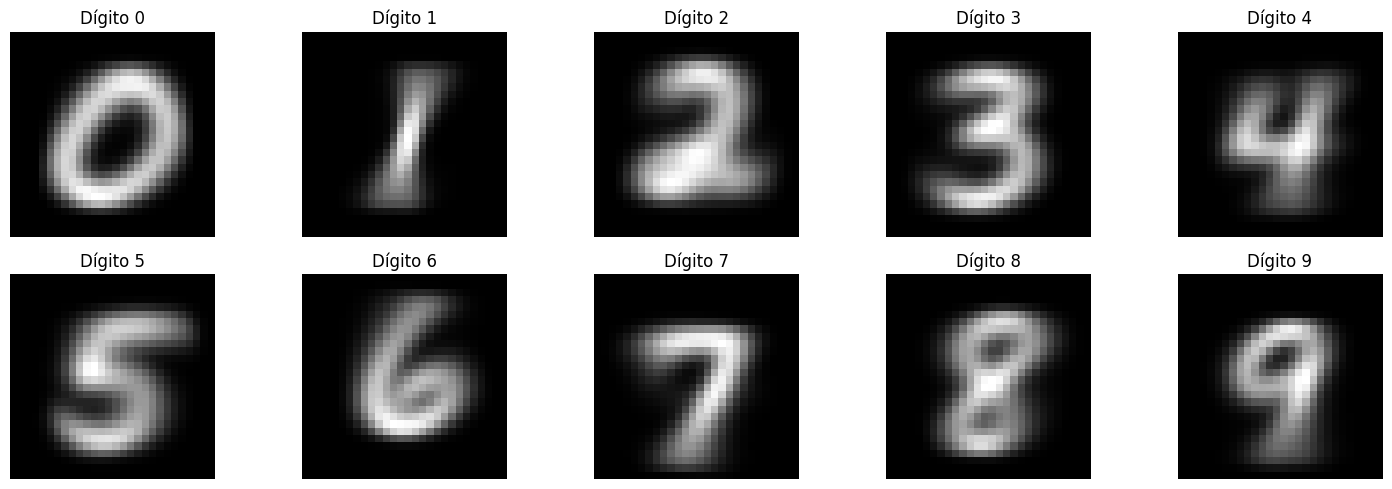

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(15, 5))
for i in range(10):
    axs[i // 5, i % 5].imshow(np.mean(X_tot[y_tot == i], axis=0), cmap='gray')
    axs[i // 5, i % 5].set_title(f'Dígito {i}')
    axs[i // 5, i % 5].axis('off')
plt.tight_layout()
plt.show()

Embora apareçam mais "borrados", é possível identificar quais são os dígitos printados. O Borrão se deve à média calculada pelo algoritmo que expande a região entre os pixels puramente brancos e pretos nas distintas imagens do mesmo dígitos, para cada dígito.

---

# 3️⃣ Tarefa 03: Treinamento e Teste de Modelos 🤖

## 📈 Item a)

Treine a ANN1 com 784 entradas, 8 neurônios na 1⁠ª camada oculta, 8 neurônios na 2⁠ª camada oculta e 10 saídas. Utilize 5 épocas para o treinamento. Use a biblioteca `scikit-learn`:

- Input Layer: 784 entradas (28x28);
- Hidden Layer 1: 8 neurônios;
- Hidden Layer 2: 8 neurônios;
- Output Layer: 10 saídas; (Classificador 0-9)
- Treine com 10 épocas.

In [ ]:
camada_oculta = (8,8)
saidas = 10

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_tot.reshape(-1, 28 * 28) / 255, y_tot, test_size=0.2, random_state=42)
#separando a base em teste e treino

In [ ]:
#Elaboração do modelo
model3a = MLPClassifier(hidden_layer_sizes = camada_oculta, max_iter = saidas, random_state = 27)
model3a.fit(X_treino, y_treino)

c:\Users\renan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=10, random_state=30)

In [ ]:
y_predict_treino = model3a.predict(X_treino)
y_predict_teste = model3a.predict(X_teste)
#printando tabela de precisão, recall e f1-score
tabela = classification_report(y_teste, y_predict_teste, output_dict=True)
tabela = pd.DataFrame(tabela).transpose()
display(tabela)

print(f"A Acurácia do conjunto de treino é de {accuracy_score(y_treino, y_predict_treino) * 100:.2f}%")
print(f"A Acurácia do conjunto de teste é de {accuracy_score(y_teste, y_predict_teste) * 100:.2f}%")

,precision,recall,f1-score,support
0,0.948233,0.949013,0.948623,1216.000000
1,0.962071,0.959273,0.960670,1375.000000
2,0.916183,0.913151,0.914664,1209.000000
3,0.896290,0.873459,0.884727,1217.000000
4,0.895093,0.909716,0.902345,1163.000000
5,0.885598,0.824144,0.853767,1052.000000
6,0.915888,0.947276,0.931317,1138.000000
7,0.950935,0.941403,0.946145,1297.000000
8,0.858191,0.890863,0.874222,1182.000000
9,0.879693,0.895743,0.887645,1151.000000


A Acurácia do conjunto de treino é de 91.80%
A Acurácia do conjunto de teste é de 91.23%


Acurácia final pouco maior de 91,23%

## 📉 Item b)

Treine a ANN2 com 784 entradas, 256 neurônios na 1⁠ª camada oculta, 256 neurônios na 2⁠ª camada oculta, 256 neurônios na 3ª camada oculta, 256 neurônios na 4ª camada oculta e 10 saídas. Utilize 20 épocas dessa vez. Use a biblioteca `scikit-learn`.

- Input Layer: 784 entradas (28x28);
- Hidden Layer 1: 256 neurônios;
- Hidden Layer 2: 256 neurônios;
- Hidden Layer 3: 256 neurônios;
- Hidden Layer 4: 256 neurônios;
- Output Layer: 10 saídas; (Classificação 0-9)
- Treine com 20 épocas.

In [ ]:
camada_oculta = (256, 256, 256, 256)
épocas = 20

In [ ]:
#Criando o modelo
model3b = MLPClassifier(hidden_layer_sizes = camada_oculta, max_iter = épocas, random_state = 27)

model3b.fit(X_treino, y_treino)

c:\Users\renan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(256, 256, 256, 256), max_iter=20,
              random_state=36)

In [ ]:
#Analogamente ao item anteiror:
y_predict_treino = model3b.predict(X_treino)
y_predict_teste = model3b.predict(X_teste)

#AnaGerando o relatório e imprimindo a tabela
tabela = classification_report(y_teste, y_predict_teste, output_dict=True)
tabela = pd.DataFrame(tabela).transpose()
display(tabela)


print(f"A Acurácia do conjunto de treino é {accuracy_score(y_treino, y_predict_treino) * 100:.2f}%")
print(f"A Acurácia do conjunto de teste é {accuracy_score(y_teste, y_predict_teste) * 100:.2f}%")

,precision,recall,f1-score,support
0,0.977346,0.993421,0.985318,1216.000000
1,0.991202,0.983273,0.987222,1375.000000
2,0.978530,0.980149,0.979339,1209.000000
3,0.979236,0.968776,0.973978,1217.000000
4,0.981771,0.972485,0.977106,1163.000000
5,0.981589,0.962928,0.972169,1052.000000
6,0.991957,0.975395,0.983607,1138.000000
7,0.985121,0.969931,0.977467,1297.000000
8,0.969218,0.985618,0.977349,1182.000000
9,0.939318,0.981755,0.960068,1151.000000


A Acurácia do conjunto de treino é 99.62%
A Acurácia do conjunto de teste é 97.76%


O novo modelo aumentou sua acurárcia em mais de 6% em relação a base de dados, um aumento considerável

## ⚙️ Item c)

Agora você treinará um novo modelo, mais adequado. Para isso, gere ao menos 5 configurações de redes neurais, variando o número de camadas ocultas, o número de neurônios e o número de épocas. As configurações devem estar intermediárias entre `[8, 8]` e `[256, 256, 256, 256]`.

Utilize a função `GridSearchCV` para realizar uma busca exaustiva pelos hiperparâmetros e encontre a configuração que oferece o melhor classificador, justificando sua escolha com base nas métricas de validação.

In [ ]:
#Definindo os hiperparâmetros para serem iterados no GridSearch
parametros= {
    'hidden_layer_sizes': [(16, 16), (512, 512), (32, 16, 32), (32, 128, 64, 64)],
    'max_iter': [30, 50]
}

In [ ]:
# Criando o modelo
model3c = MLPClassifier(random_state=27)

# Configurar o GridSearchCV
grid_search = GridSearchCV(model3c, parametros, cv=3, n_jobs=-1, verbose=2, scoring='accuracy', refit=True)

#Utilizando o gridsearch para encontrar os melhores hiperparâmetros
grid_search.fit(X_treino, y_treino)

best_model = grid_search.best_estimator_

best_params = grid_search.best_params_

print("Melhores hiperparâmetros encontrados:")
print(best_params)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Melhores hiperparâmetros encontrados:
{'hidden_layer_sizes': (512, 512), 'max_iter': 30}


c:\Users\renan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#Fazendo a previsão
y_pred_train = best_model.predict(X_treino)
y_pred_test = best_model.predict(X_teste)

#Analogamente com as previsões anteriores:
tabela = classification_report(y_teste, y_pred_test, output_dict=True)
tabela = pd.DataFrame(tabela).transpose()
display(tabela)

print(f"A Acurácia do conjunto de treino é {accuracy_score(y_treino, y_pred_train) * 100:.2f}%")
print(f"A Acurácia do conjunto de teste é {accuracy_score(y_teste, y_pred_test) * 100:.2f}%")

,precision,recall,f1-score,support
0,0.990961,0.991776,0.991369,1216.00000
1,0.991150,0.977455,0.984255,1375.00000
2,0.984245,0.981803,0.983023,1209.00000
3,0.976974,0.976171,0.976572,1217.00000
4,0.983677,0.984523,0.984100,1163.00000
5,0.983591,0.968631,0.976054,1052.00000
6,0.982563,0.990334,0.986433,1138.00000
7,0.982985,0.979954,0.981467,1297.00000
8,0.960166,0.978849,0.969418,1182.00000
9,0.975000,0.982624,0.978797,1151.00000


A Acurácia do conjunto de treino é 99.97%
A Acurácia do conjunto de teste é 98.12%


## 🔧 Item d)

Para os modelos treinados nas questões a) e b), além do classificador encontrado na questão c), compare o desempenho dos modelos, analisando se apresentam *underfitting* ou *overfitting*. Justifique com gráficos e análises.


In [ ]:
# Função que plota os gráficos lado a lado
def grafico_acuracia_comparativo(models, X_treino, y_treino, X_teste, y_teste):
    classes = np.unique(y_treino)
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)  # 1 linha, 3 colunas

    for i, (titulo, layers, epochs) in enumerate(models):
        train_accuracy = []
        test_accuracy = []

        # Configura o modelo
        ANN = MLPClassifier(hidden_layer_sizes=layers, max_iter=1, warm_start=True, random_state=42)

        # Treinamento por época
        for _ in range(epochs):
            ANN.partial_fit(X_treino, y_treino, classes=classes)

            # Fazendo a previsão
            y_pred_train = ANN.predict(X_treino)
            y_pred_test = ANN.predict(X_teste)

            train_accuracy.append(accuracy_score(y_treino, y_pred_train))
            test_accuracy.append(accuracy_score(y_teste, y_pred_test))

        # Gráfico no subplot correspondente
        axes[i].plot(range(1, epochs + 1), train_accuracy, marker='o', label='Train Accuracy')
        axes[i].plot(range(1, epochs + 1), test_accuracy, marker='o', label='Test Accuracy')
        axes[i].set_title(f"Acurácia {titulo}")
        axes[i].set_xlabel('Época')
        axes[i].set_ylabel('Acurácia')
        axes[i].legend()
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()


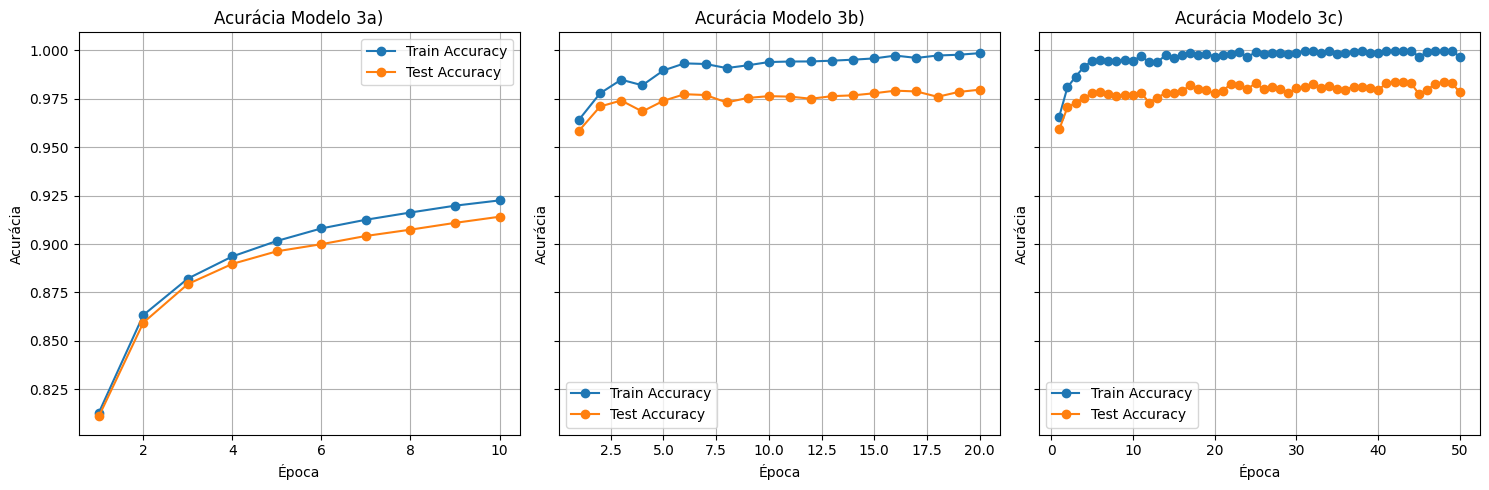

In [ ]:
# Definindo os modelos e épocas
models = [
    ('Modelo 3a)', (8, 8), 10),
    ('Modelo 3b)', (256, 256, 256, 256), 20),
    ('Modelo 3c)', (512, 512), 50)
]

grafico_acuracia_comparativo(models, X_treino, y_treino, X_teste, y_teste)

- Gráfico item 3a): Apresenta baixa acurárica especialmente para épocas menores. Com uma baixa variação da acurácia com o aumento das épocas, pode indicar underfitting.

- Gráfico item 3b): Melhora da acurárcia em relação ao gráfico do item a, especialmente para 1 época. Acurácia de treino é maior que a acurácia de teste, e as variações "sentidas" pela variação da época no conjunto de treino é acompanhada pelo mesmo tipo de variação no conjunto de teste, indicando overfitting.

- Modelo da questão 3c) Apresenta melhoras gerais em relação ao segundo modelo, entretanto, ainda apresenta distantciamento entre treino e teste com variações semelhantes, indicando overfitting.

---

# 4️⃣ Tarefa 04: Resultados e Visualizações 🤞🏻

## 🐳 Item a)

Gere e apresente uma matriz de confusão que mostre a distribuição das previsões do melhor modelo. Quais as métricas de Acurácia, Precisão, Recall e F1-Score para esse modelo?

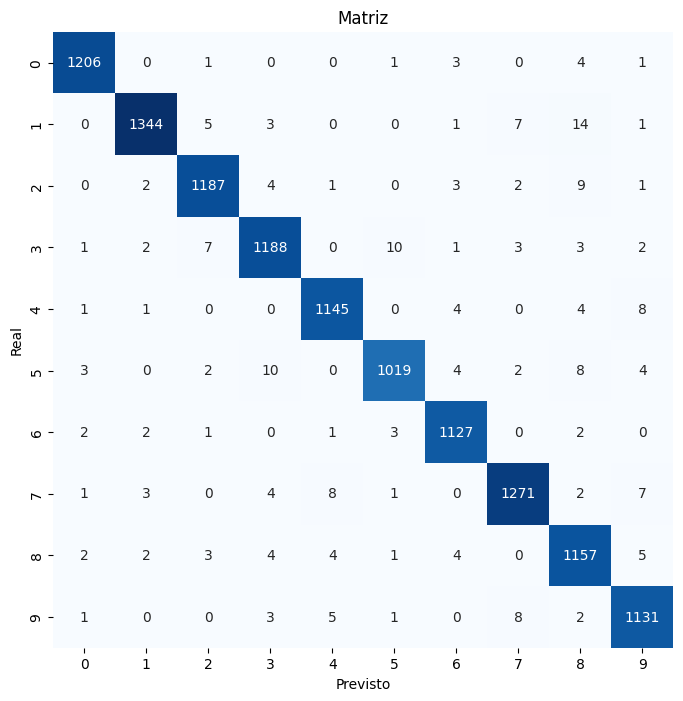

In [ ]:
y_pred_treino = best_model.predict(X_treino)
y_pred_teste = best_model.predict(X_teste)
matriz = confusion_matrix(y_teste,y_pred_test)

plt.figure(figsize=(8, 8))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz')
plt.show()

Podemos notar que os pares em que há maior erro são os pares 1 e 8 (14), 5 e 3 (10), 2 e 8 (9), 5 e 8 (9), 9 e 7 (7). Note que o algorítmo muitas vezes previu 8 quando na verdade deveria ter previsto outro número, como 1, 2 e 5. Com isso, cabe uma revisão do modelo pensando em evitar esse "Vício".

In [ ]:
tabela = classification_report(y_teste, y_pred_test, output_dict=True)
tabela = pd.DataFrame(tabela).transpose()
display(tabela)

,precision,recall,f1-score,support
0,0.990961,0.991776,0.991369,1216.00000
1,0.991150,0.977455,0.984255,1375.00000
2,0.984245,0.981803,0.983023,1209.00000
3,0.976974,0.976171,0.976572,1217.00000
4,0.983677,0.984523,0.984100,1163.00000
5,0.983591,0.968631,0.976054,1052.00000
6,0.982563,0.990334,0.986433,1138.00000
7,0.982985,0.979954,0.981467,1297.00000
8,0.960166,0.978849,0.969418,1182.00000
9,0.975000,0.982624,0.978797,1151.00000


Como esperado, observamos que o dígito 8 é aquele que apresenta menor precisão, de 96%. Todos os outros dígitos apresentam precisão mínima de 97,5%

## 🐸 Item b)

Exiba gráficos que mostram a evolução da acurácia e da perda (`Loss`) durante o treinamento do melhor modelo encontrado no item 3c).

In [ ]:
def grafico_acuracia(titulo, layers, epoca, X_train, y_train, X_test, y_test):
    classes = np.unique(y_train)
    train_accuracy = []
    test_accuracy = []

    ANN = MLPClassifier(hidden_layer_sizes=layers, max_iter=1, warm_start=True, random_state=42)

    #Executa uma época por vez
    for _ in range(epoca):
        ANN.partial_fit(X_train, y_train, classes=classes)

        #Fazendo a previsão
        y_pred_train = ANN.predict(X_train)
        y_pred_test = ANN.predict(X_test)

        train_accuracy.append(accuracy_score(y_train, y_pred_train))
        test_accuracy.append(accuracy_score(y_test, y_pred_test))

    plt.figure(figsize=(8, 4))
    plt.plot(range(1, epoca + 1), train_accuracy, marker='o', label='Train Accuracy')
    plt.plot(range(1, epoca + 1), test_accuracy, marker='o', label='Test Accuracy')
    plt.title(f"Acurácia pela época {titulo}")
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid(True)
    plt.show()

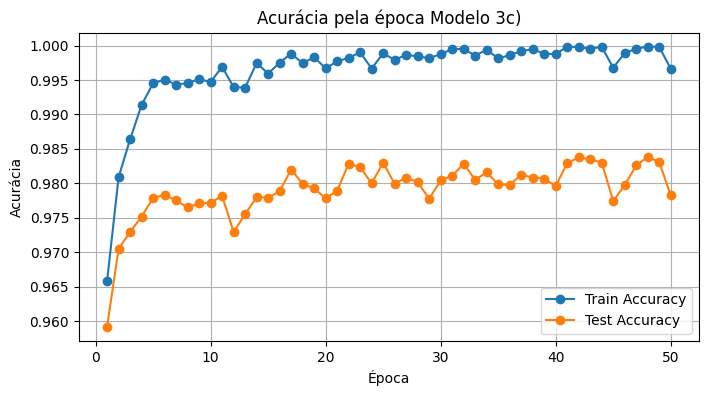

In [ ]:
grafico_acuracia('Modelo 3c)', (512, 512), 50, X_treino, y_treino, X_teste, y_teste)

In [ ]:
def grafico_perda(titulo, layers, epochs, X_train, y_train, X_test, y_test):
    test_loss = []

    ANN = MLPClassifier(hidden_layer_sizes=layers, max_iter=1, warm_start=True, random_state=42)

    #Executa uma época por vez
    for _ in range(epochs):
        ANN.fit(X_train, y_train)

        #Cálculo de perda
        loss = log_loss(y_test, ANN.predict_proba(X_test))
        test_loss.append(loss)

    train_loss = ANN.loss_curve_

    plt.figure(figsize=(8, 4))
    plt.plot(train_loss, marker='o', label='Train Loss')
    plt.plot(test_loss, marker='o', label='Test Loss')
    plt.title(f"Loss pela época {titulo}")
    plt.xlabel("Época")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

c:\Users\renan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\renan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\renan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\renan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization

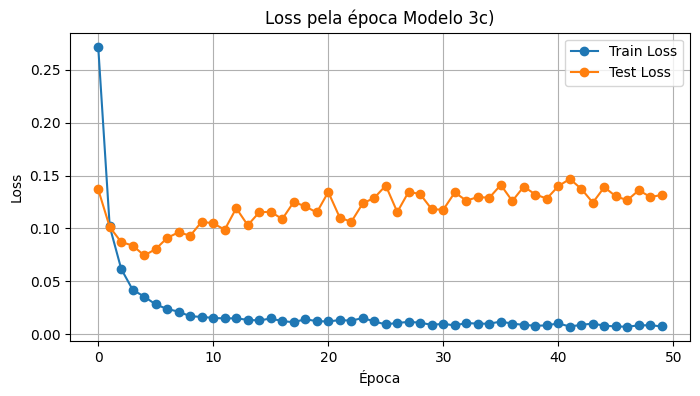

In [ ]:
grafico_perda('Modelo 3c)', (512, 512), 50, X_treino, y_treino, X_teste, y_teste)
import warnings
warnings.filterwarnings("ignore")


## 🦖 Item c)

Escolha algumas imagens do conjunto de teste e mostre previsões do seu modelo, com acertos e erros. Discuta quais fatores podem ter contribuído para essas previsões corretas e incorretas.

In [ ]:
def previsões_comparativo(X_teste, y_teste, y_pred, n):
    certos = np.where(y_teste == y_pred)[0]
    errados = np.where(y_teste != y_pred)[0]

    random.seed(42)
    selected_correct = random.sample(
        list(certos),
        n//2
    )
    selected_wrong = random.sample(
        list(errados),
        n//2
    )

    selected_indices = selected_correct + selected_wrong

    plt.figure(figsize=(16, 6))
    for i, idx in enumerate(selected_indices):
        plt.subplot(n//7, 7, i + 1)

        img = X_teste[idx].reshape(28, 28)
        plt.imshow(img, cmap='gray')

        color = 'green' if y_teste[idx] == y_pred[idx] else 'red'
        plt.title(
            f'Real: {y_teste[idx]}    Previsto: {y_pred[idx]}',
            color=color,
        )
        plt.axis('off')

    plt.tight_layout()
    plt.show()

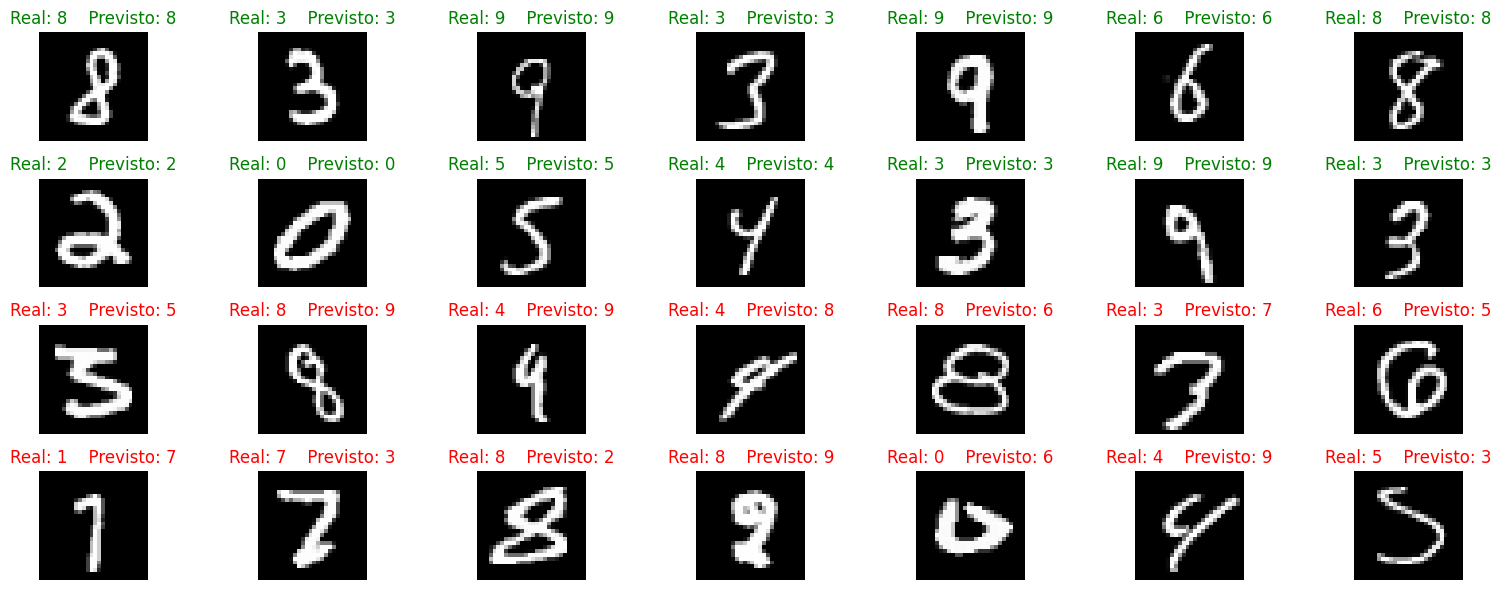

In [ ]:
previsões_comparativo(X_teste, y_teste, y_pred_teste, n = 28)

- Previsões corretas: As previsões corretas possuem número mais bem definidos: (8 com os dois buracos bem evidentes, 3 com curvas bem definidas, 9 com a parte circular e tronco vertical evidentes, 0 fechado, 4 com espaçamento aberto e bem definido). Dessa forma, tem-se uma distinção mais clara entre os números, de modo que torna mais intuitivp para o modelo acertar


- Previsões errôneas: Verificamos que as previsões erroneas decorrem geralmente de uma escrtira irregular dos números expostos. Temos como exemplo o primeiro erro Previsto como 5 que era para ser um 3, em que não se tem as curvas bem definidas. Exemplos são vários (1 com o traço superior, 8 sem os buracos bem definidos sendo mais semelhante com um 2 ou um 9, 0 aberto, 4 quase fechando tendendo a um 9). De modo geral, essas imagens estão mais distantes das médias calculadas no item c da questão 2 e do conjunto utilizado para teste.

---

# 5️⃣ Tarefa 05: Lembrete *Kaggle* e Documentação 🗃️

## 😮‍💨 Item a)

# Lembre-se de publicar no *Kaggle* com o título correto e padronizado!

In [ ]:
# Preparando para a submissão para o Kaggle
X_treino = X_tot.reshape(-1,28 * 28) / 255
X_val = X_val.reshape(-1,28 * 28) / 255
y_treino = y_tot

#Criando o modelo
modelo_final = MLPClassifier(
    hidden_layer_sizes=(512, 512),
    max_iter=46,
    random_state=42
    )

#Treinando o modelo
modelo_final.fit(X_treino, y_treino)

#Realizando a previsão
y_pred = modelo_final.predict(X_val)

In [ ]:
df_submission = pd.DataFrame({'ID': np.arange(1,10001), 'Answer':y_pred})
df_submission.set_index("ID", inplace=True)
df_submission.head()

,Answer
ID,
1,8
2,4
3,8
4,7
5,7


In [ ]:
df_submission.describe()

,Answer
count,10000.000000
mean,4.476900
std,2.907527
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


In [ ]:
df_submission.to_csv('submission.csv')

## 🙏🏻 Item b)

# Lembre-se de documentar adequadamente seu código e conclusões!